In [190]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [191]:
data_base = pd.read_csv('petr4_treinamento.csv')

In [129]:
data_base_analysis = data_base.iloc[:, 0:2]

In [130]:
data_base_analysis

,Date,Open
0,2013-01-02,19.990000
1,2013-01-03,19.809999
2,2013-01-04,20.330000
3,2013-01-07,20.480000
4,2013-01-08,20.110001
...,...,...
1240,2017-12-25,15.750000
1241,2017-12-26,15.750000
1242,2017-12-27,15.990000
1243,2017-12-28,16.100000


In [131]:
data_base_analysis['Date']= pd.to_datetime(data_base_analysis['Date'])
data_base_analysis = data_base_analysis.set_index('Date')

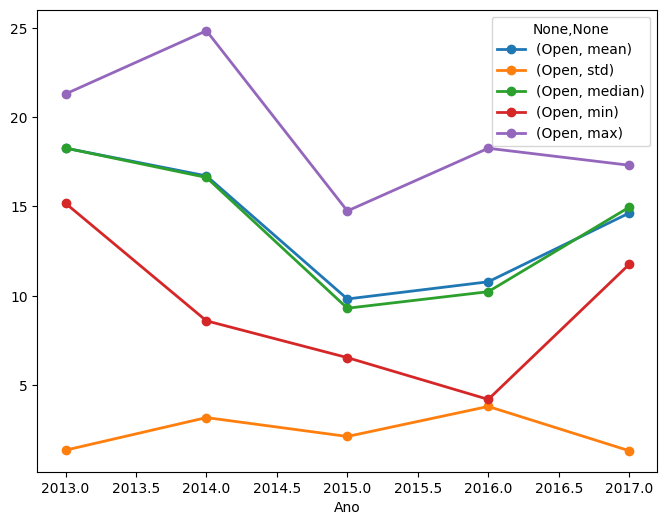

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
data_base_analysis['year'] = data_base_analysis.index.year
grouped = data_base_analysis.groupby('year').agg(["mean", "std", "median", "min", "max"])
grouped.plot(ax=ax, marker="o", linewidth=2)
ax.set_xlabel('Ano')
plt.show()

In [133]:
data_base_analysis.year.unique()

array([2013, 2014, 2015, 2016, 2017])

In [134]:
data_base_analysis

,Open,year
Date,,
2013-01-02,19.990000,2013
2013-01-03,19.809999,2013
2013-01-04,20.330000,2013
2013-01-07,20.480000,2013
2013-01-08,20.110001,2013
...,...,...
2017-12-25,15.750000,2017
2017-12-26,15.750000,2017
2017-12-27,15.990000,2017


In [135]:
time_series = data_base_analysis['Open']

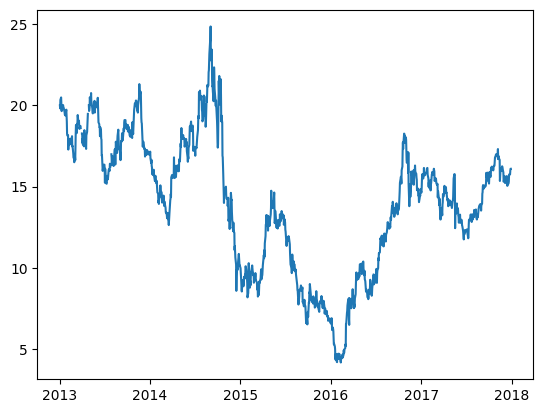

In [136]:
plt.plot(time_series)

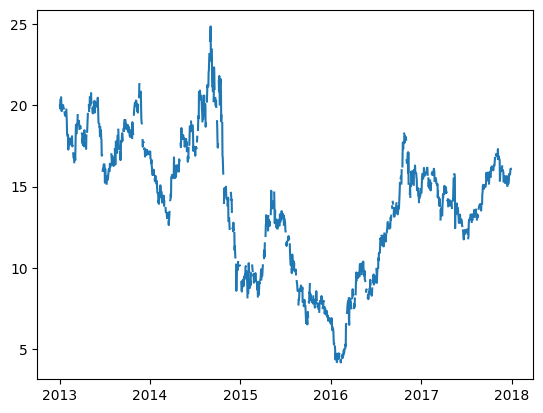

In [137]:
res = data_base_analysis["Open"].resample("D").apply([np.mean])
plt.plot(res)

In [138]:
data_base.dropna(inplace = True)


#Moving average

In [139]:
data = data_base.copy()
data['Rolling_Mean'] = data['Open'].rolling(window = 80).mean()
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling_Mean
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0,NaN
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0,NaN
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0,NaN
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0,NaN
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0,NaN


In [140]:
data = data.copy()
data['Ticks'] = range(0,len(data))

In [141]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling_Mean,Ticks
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0,NaN,0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0,NaN,1
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0,NaN,2
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0,NaN,3
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0,NaN,4
...,...,...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0,15.822625,1237
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0,15.837375,1238
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0,15.854125,1239
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0,15.867625,1240


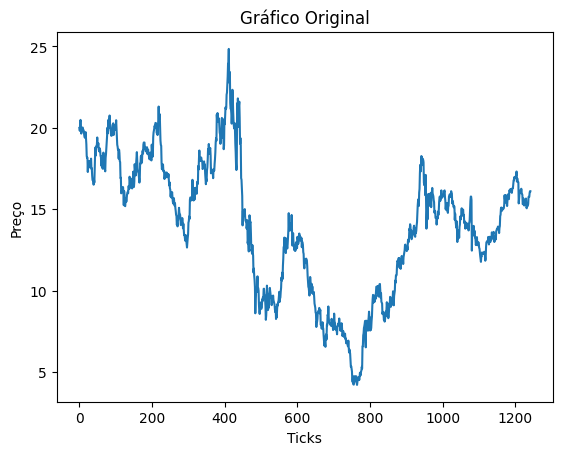

In [142]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Preço')
ax1.set_title('Gráfico Original')
ax1.plot('Ticks', 'Open', data = data);

In [143]:
data = data.copy()
data['Rolling_Mean'] = data['Open'].rolling(window = 80).mean()
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling_Mean,Ticks
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0,NaN,0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0,NaN,1
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0,NaN,2
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0,NaN,3
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0,NaN,4


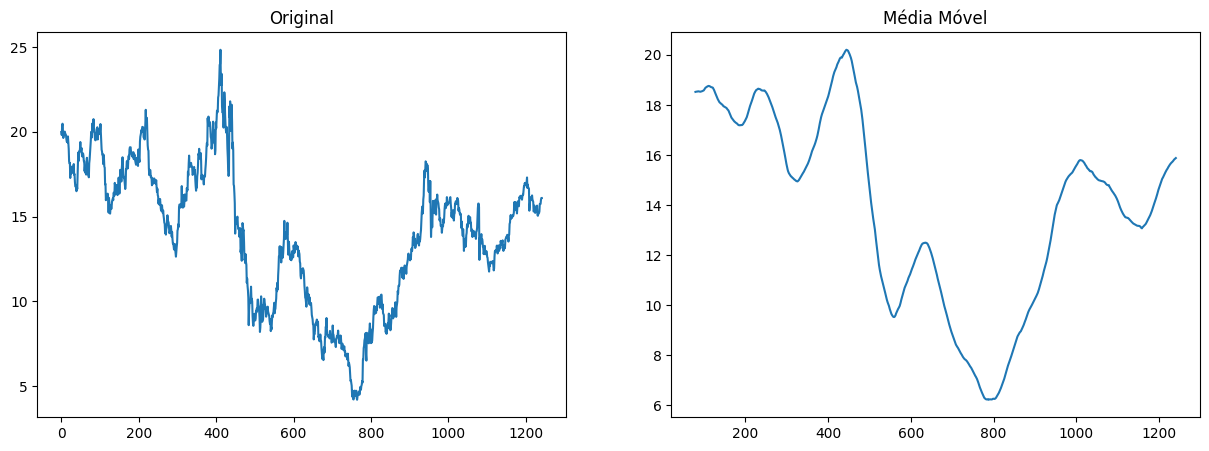

In [144]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5));
axes[0].plot('Ticks', 'Open', data = data);
axes[0].set_title('Original');

axes[1].plot('Ticks', 'Rolling_Mean', data = data);
axes[1].set_title('Média Móvel');

In [145]:
data_base.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [146]:
data_base.iloc[:, 1:2]

,Open
0,19.990000
1,19.809999
2,20.330000
3,20.480000
4,20.110001
...,...
1240,15.750000
1241,15.750000
1242,15.990000
1243,16.100000


In [147]:
train_data_base = data_base.iloc[:,1:2].values

In [148]:
normalizer = MinMaxScaler(feature_range=(0,1))
train_data_base_normalized = normalizer.fit_transform(train_data_base)

In [149]:
train_data_base_normalized[0]

array([0.76501938])

In [150]:
forecasters = []
real_price = []
for i in range(90, 1242):
  forecasters.append(train_data_base_normalized[i-90:i, 0])
  real_price.append(train_data_base_normalized[i,0])
forecasters, real_price = np.array(forecasters), np.array(real_price)

In [151]:
forecasters.shape

(1152, 90)

In [152]:
forecasters = np.reshape(forecasters, (forecasters.shape[0], forecasters.shape[1],1))

In [153]:
forecasters.shape

(1152, 90, 1)

In [154]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape=(forecasters.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation ='linear'))

regressor.compile(optimizer = 'rmsprop', loss= 'mean_squared_error',
                  metrics = ['mean_absolute_error'])

regressor.fit(forecasters, real_price, epochs = 100, batch_size=32)

Epoch 1/100
36/36 [==============================] - 16s 179ms/step - loss: 0.0300 - mean_absolute_error: 0.1290
Epoch 2/100
36/36 [==============================] - 8s 211ms/step - loss: 0.0139 - mean_absolute_error: 0.0922
Epoch 3/100
36/36 [==============================] - 6s 179ms/step - loss: 0.0127 - mean_absolute_error: 0.0881
Epoch 4/100
36/36 [==============================] - 8s 211ms/step - loss: 0.0120 - mean_absolute_error: 0.0833
Epoch 5/100
36/36 [==============================] - 7s 191ms/step - loss: 0.0107 - mean_absolute_error: 0.0781
Epoch 6/100
36/36 [==============================] - 7s 196ms/step - loss: 0.0092 - mean_absolute_error: 0.0759
Epoch 7/100
36/36 [==============================] - 8s 211ms/step - loss: 0.0091 - mean_absolute_error: 0.0733
Epoch 8/100
36/36 [==============================] - 7s 181ms/step - loss: 0.0089 - mean_absolute_error: 0.0727
Epoch 9/100
36/36 [==============================] - 7s 209ms/step - loss: 0.0069 - mean_absolute_error

In [155]:
data_base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [156]:
data_base_test = pd.read_csv('/content/petr4_teste.csv')
real_price_test = data_base_test.iloc[:, 1:2].values
complete_data_base = pd.concat((data_base['Open'], data_base_test['Open']), axis = 0)

In [157]:
inputs = complete_data_base[len(complete_data_base) - len(data_base_test) - 90:].values

In [158]:
inputs = inputs.reshape(-1,1)
inputs = normalizer.transform(inputs)

In [159]:
X_test = []
for i in range(90, 112):
  X_test.append(inputs[i-90:i, 0])
X_test=np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
forecasts = regressor.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [160]:
forecasts= normalizer.inverse_transform(forecasts)

In [161]:
forecasts.mean(), real_price_test.mean()

(16.967892, 17.87454563636364)

#Results

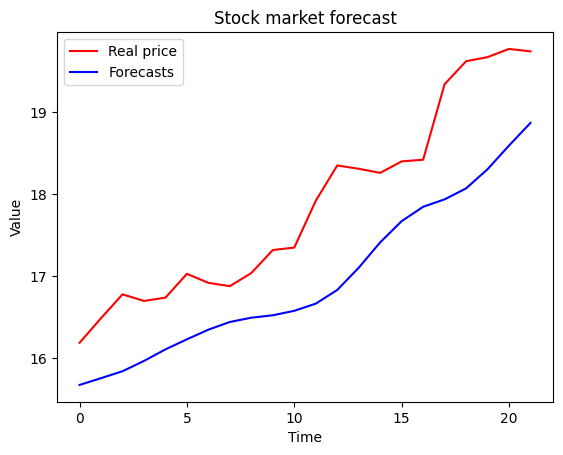

In [162]:
plt.plot(real_price_test, color='red', label = 'Real price')
plt.plot(forecasts, color='blue', label = 'Forecasts')
plt.title('Stock market forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

#Using multiple predictors

In [163]:
data_base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [164]:
train_data = data_base.iloc[:, 1:7].values

In [165]:
sc = MinMaxScaler(feature_range=(0,1))
train_data_normalized = sc.fit_transform(train_data)

In [166]:
forecast_sc = MinMaxScaler(feature_range=(0,1))
forecast_sc.fit_transform(train_data[:,0:1])

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [167]:
forecasters = []
real_price = []
for i in range(90, 1242):
  forecasters.append(train_data_normalized[i-90:i, 0:6])
  real_price.append(train_data_normalized[i,0])
forecasters, real_price = np.array(forecasters), np.array(real_price)

In [168]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [169]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape=(forecasters.shape[1],6))) #units: numero de celulas de memoria (deve ser grande), 6 atributos previsores
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation ='sigmoid')) #como os valores estão normalizados, entre 0 e 1, podemos utilizar a função sigmoid

regressor.compile(optimizer = 'adam', loss= 'mean_squared_error',
                  metrics = ['mean_absolute_error'])

es = EarlyStopping(monitor = 'loss', min_delta=1e-10, patience = 10, verbose = 1 )
rlr = ReduceLROnPlateau(monitor = 'loss', factor= 0.2, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath = 'pesos.h5', monitor = 'loss', save_best_only=True, verbose =1)

regressor.fit(forecasters, real_price, epochs = 100, batch_size=32, callbacks =[es, rlr,mcp])

Epoch 1/100
36/36 [==============================] - ETA: 0s - loss: 0.0173 - mean_absolute_error: 0.0991
Epoch 1: loss improved from inf to 0.01728, saving model to pesos.h5
36/36 [==============================] - 15s 181ms/step - loss: 0.0173 - mean_absolute_error: 0.0991 - lr: 0.0010
Epoch 2/100
36/36 [==============================] - ETA: 0s - loss: 0.0051 - mean_absolute_error: 0.0556
Epoch 2: loss improved from 0.01728 to 0.00506, saving model to pesos.h5
36/36 [==============================] - 8s 210ms/step - loss: 0.0051 - mean_absolute_error: 0.0556 - lr: 0.0010
Epoch 3/100
36/36 [==============================] - ETA: 0s - loss: 0.0042 - mean_absolute_error: 0.0498
Epoch 3: loss improved from 0.00506 to 0.00418, saving model to pesos.h5
36/36 [==============================] - 7s 185ms/step - loss: 0.0042 - mean_absolute_error: 0.0498 - lr: 0.0010
Epoch 4/100
36/36 [==============================] - ETA: 0s - loss: 0.0040 - mean_absolute_error: 0.0492
Epoch 4: loss improve

In [170]:
test_data = pd.read_csv('/content/petr4_teste.csv')
test_real_price = test_data.iloc[:, 1:2].values
frames = [data_base, test_data]
complete_data = pd.concat(frames)

In [171]:
complete_data = complete_data.drop('Date', axis =1)

In [172]:
inputs = complete_data[len(complete_data) - len(test_data) - 90:].values
inputs = sc.transform(inputs)

In [173]:
X_test = []
for i in range(90, 112):
  X_test.append(inputs[i-90:i, 0:6])
X_test=np.array(X_test)
X_test.shape

(22, 90, 6)

In [174]:
forecasts = regressor.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [175]:
forecasts= forecast_sc.inverse_transform(forecasts)

In [176]:
forecasts.mean(), test_real_price.mean()

(17.572203, 17.87454563636364)

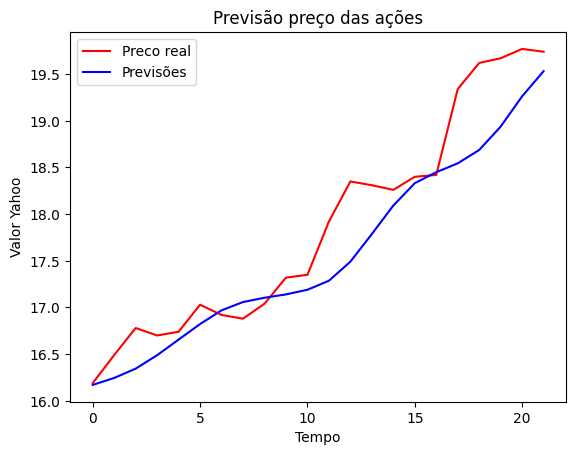

In [177]:
plt.plot(test_real_price, color='red', label = 'Preco real')
plt.plot(forecasts, color='blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()

#GRUs

In [178]:
from tensorflow.keras.layers import Dense, GRU, Dropout

In [181]:
train_data_base = data_base.iloc[:,1:2].values

In [182]:
normalizer = MinMaxScaler(feature_range=(0,1))
train_data_base_normalized = normalizer.fit_transform(train_data_base)

In [183]:
train_data_base_normalized[0]

array([0.76501938])

In [184]:
forecasters = []
real_price = []
for i in range(90, 1242):
  forecasters.append(train_data_base_normalized[i-90:i, 0])
  real_price.append(train_data_base_normalized[i,0])
forecasters, real_price = np.array(forecasters), np.array(real_price)

In [185]:
forecasters.shape

(1152, 90)

In [186]:
forecasters = np.reshape(forecasters, (forecasters.shape[0], forecasters.shape[1],1))

In [187]:
forecasters.shape

(1152, 90, 1)

In [188]:
model = Sequential()
model.add(GRU(units = 100, return_sequences = True, input_shape = (forecasters.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(units = 100, return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(units = 100, return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(units = 100, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [189]:
model.fit(forecasters, real_price, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 [==============================] - 16s 268ms/step - loss: 0.0223
Epoch 2/50
36/36 [==============================] - 10s 270ms/step - loss: 0.0041
Epoch 3/50
36/36 [==============================] - 9s 237ms/step - loss: 0.0035
Epoch 4/50
36/36 [==============================] - 10s 261ms/step - loss: 0.0031
Epoch 5/50
36/36 [==============================] - 10s 268ms/step - loss: 0.0028
Epoch 6/50
36/36 [==============================] - 10s 267ms/step - loss: 0.0029
Epoch 7/50
36/36 [==============================] - 8s 235ms/step - loss: 0.0026
Epoch 8/50
36/36 [==============================] - 10s 269ms/step - loss: 0.0023
Epoch 9/50
36/36 [==============================] - 10s 270ms/step - loss: 0.0026
Epoch 10/50
36/36 [==============================] - 10s 267ms/step - loss: 0.0032
Epoch 11/50
36/36 [==============================] - 9s 248ms/step - loss: 0.0030
Epoch 12/50
36/36 [==============================] - 10s 280ms/step - loss: 0.0023
Epoch 13/50
36/3

In [ ]:
y_pred = model.predict(X_test)
predicted_price = normalizer.inverse_transform(y_pred)

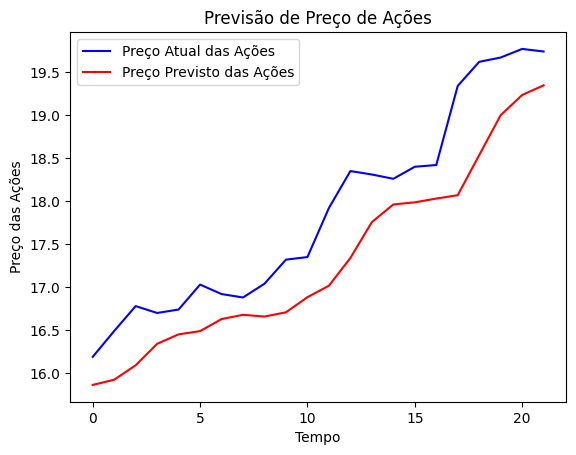

In [192]:
plt.plot(real_price_test, color='blue', label='Preço Atual das Ações')
plt.plot(predicted_price, color='red', label='Preço Previsto das Ações')
plt.title('Previsão de Preço de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preço das Ações')
plt.legend()
plt.show()
